In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

In [25]:
df = pd.read_csv('/tmp/HINDALCO.csv')
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))
print(df.to_string())

                                datetime   close    high     low    open    volume instrument
2014-01-24 00:00:00  2014-01-24 00:00:00  114.00  115.35  113.00  113.15   5737135   HINDALCO
2014-01-27 00:00:00  2014-01-27 00:00:00  111.10  112.70  109.30  112.00   8724577   HINDALCO
2014-01-28 00:00:00  2014-01-28 00:00:00  113.80  115.00  109.75  110.00   4513345   HINDALCO
2014-01-29 00:00:00  2014-01-29 00:00:00  111.75  114.75  111.15  114.50   4713458   HINDALCO
2014-01-30 00:00:00  2014-01-30 00:00:00  108.10  110.70  107.60  110.20   5077231   HINDALCO
2014-01-31 00:00:00  2014-01-31 00:00:00  109.55  110.00  107.00  109.05   8287236   HINDALCO
2014-02-03 00:00:00  2014-02-03 00:00:00  103.45  109.40  103.00  109.00   5572627   HINDALCO
2014-02-04 00:00:00  2014-02-04 00:00:00  102.45  103.45   99.80  102.00  13935173   HINDALCO
2014-02-05 00:00:00  2014-02-05 00:00:00  104.25  105.15  101.00  102.40   9106760   HINDALCO
2014-02-06 00:00:00  2014-02-06 00:00:00  105.75  106.50  10

# Simple Moving Average Crossover

In [26]:
def SMA(data, period = 30, column='close'):
    return data[column].rolling(window=period).mean()

In [27]:
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [28]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['close'], np.NAN)

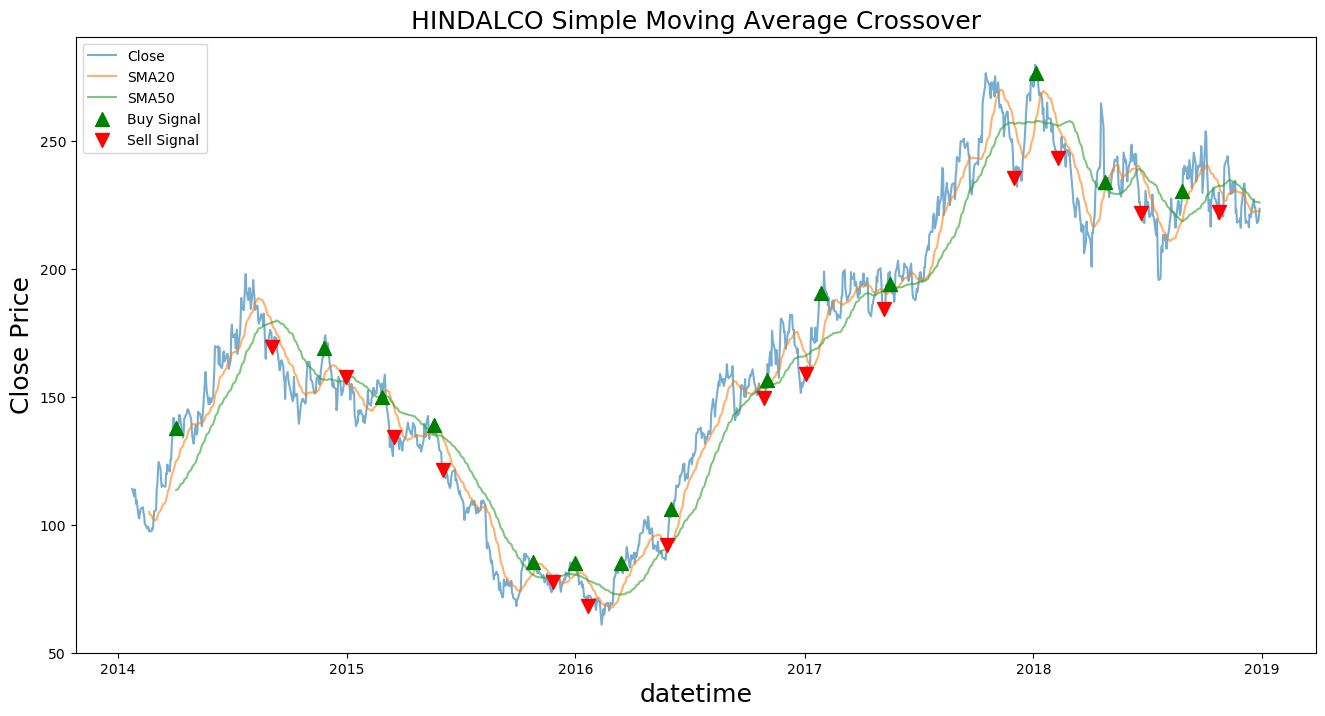

In [29]:
plt.figure(figsize=(16,8))
plt.title('HINDALCO Simple Moving Average Crossover', fontsize=18)
plt.plot(df['close'], alpha=0.6, label='Close', zorder=1)
plt.plot(df['SMA20'], alpha=0.6, label='SMA20', zorder=1)
plt.plot(df['SMA50'], alpha=0.6, label='SMA50', zorder=1)
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green', zorder=3, s=100)
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red', zorder=3, s=100)
plt.xlabel('datetime', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='best')
plt.show()